<a href="https://colab.research.google.com/github/jiho050718/datajo/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터조 발표 자료

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [52]:
!git clone https://github.com/jiho050718/datajo

fatal: destination path 'datajo' already exists and is not an empty directory.


## CSV 불러와서 일부 출력

In [53]:
# CSV 파일 불러오기
df = pd.read_csv("datajo/titanic1309.csv")
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
1152,1153,0,3,"Nilsson, Mr. August Ferdinand",male,21.0,0,0,350410,7.8542,NaN,S
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S


## 데이터 프레임으로 저장 후 칼럼 확인

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


## 타이타닉 열(변수) 설명

| 변수명        | 설명                                                         |
| ------------- | ------------------------------------------------------------ |
| `PassengerId` | 승객 고유 번호 (각 사람을 구별하는 ID)                      |
| `Survived`    | 생존 여부 (0 = 사망, 1 = 생존)                               |
| `Pclass`      | 객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)                  |
| `Name`        | 승객 이름 (예: Mr. John Smith)                              |
| `Sex`         | 성별 (`male` = 남자, `female` = 여자)                      |
| `Age`         | 나이 (정수 또는 실수, 일부 결측값 존재)                      |
| `SibSp`       | 함께 탄 형제자매 또는 배우자 수                              |
| `Parch`       | 함께 탄 부모 또는 자녀 수                                   |
| `Ticket`      | 티켓 번호 (탑승권 번호)                                      |
| `Fare`        | 운임 요금 (티켓 가격)                                        |
| `Cabin`       | 선실 번호 (많은 결측값 존재)                                |
| `Embarked`    | 탑승한 항구 (`C`=셰르부르, `Q`=퀸스타운, `S`=사우샘프턴) |

# 생존율

## 좌석별 생존율

In [55]:
# 1등석 데이터 필터링
second_class = df[df['Pclass'] == 1]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['1등석 총 승객 수', '1등석 생존자 수', '1등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,1등석 총 승객 수,323.00
1,1등석 생존자 수,186.00
2,1등석 생존율 (%),57.59


In [56]:
# 2등석 데이터 필터링
second_class = df[df['Pclass'] == 2]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['2등석 총 승객 수', '2등석 생존자 수', '2등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,2등석 총 승객 수,277.00
1,2등석 생존자 수,117.00
2,2등석 생존율 (%),42.24


In [57]:
# 3등석 데이터 필터링
second_class = df[df['Pclass'] == 3]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['3등석 총 승객 수', '3등석 생존자 수', '3등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,3등석 총 승객 수,709.00
1,3등석 생존자 수,191.00
2,3등석 생존율 (%),26.94


### 좌석별 생존율 시각화

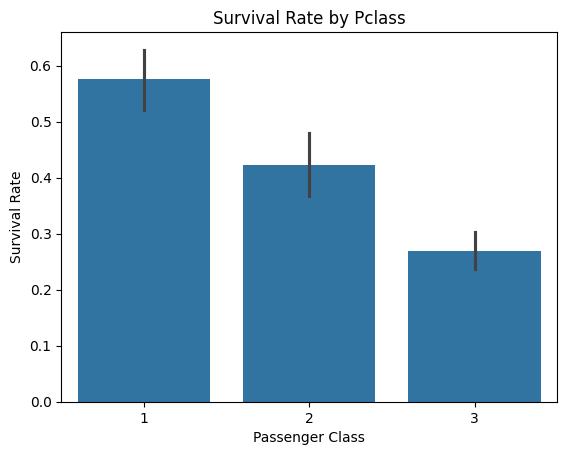

In [58]:
# 시각화
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# 생존자 vs 비생존자 비율 원형 차트

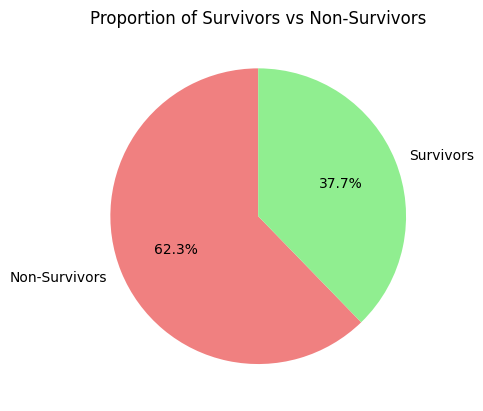

In [59]:
# 생존자 vs 비생존자 비율 원형 차트
survival_proportions = df['Survived'].value_counts()
plt.pie(survival_proportions, labels=['Non-Survivors', 'Survivors'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Proportion of Survivors vs Non-Survivors')
plt.show()

# 나이 분포 히스토그램

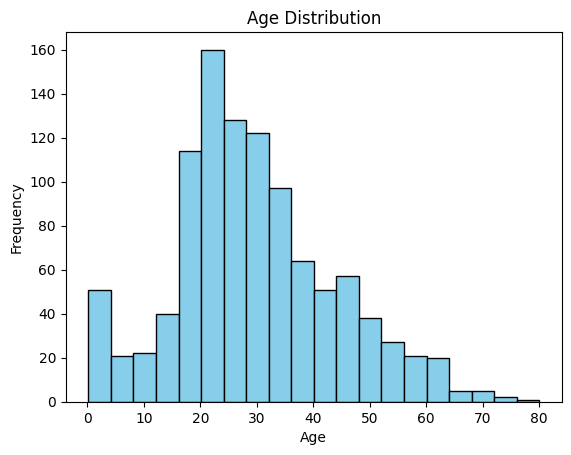

In [60]:
# 나이 분포 히스토그램
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 나이별 생존율

In [61]:
# 나이를 10세 단위로 범주화
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
                        labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'],
                        include_lowest=True)

# 나이 그룹별 생존율 계산
age_survival_rate = df.groupby('AgeGroup', observed=True)['Survived'].agg(['count', 'sum', 'mean'])
age_survival_rate['Survival Rate (%)'] = age_survival_rate['mean'] * 100
age_survival_rate = age_survival_rate[['count', 'sum', 'Survival Rate (%)']].round(2)
age_survival_rate.columns = ['Total Passengers', 'Survivors', 'Survival Rate (%)']

# 데이터프레임 표로 출력
print("\n전체 나이 그룹별 생존율:")
age_survival_rate


전체 나이 그룹별 생존율:


,Total Passengers,Survivors,Survival Rate (%)
AgeGroup,,,
0-10,86,48,55.81
10-20,162,66,40.74
20-30,361,129,35.73
30-40,210,89,42.38
40-50,132,48,36.36
50-60,62,28,45.16
60-70,27,7,25.93
70-80,6,2,33.33


### 나이별 생존율 시각화

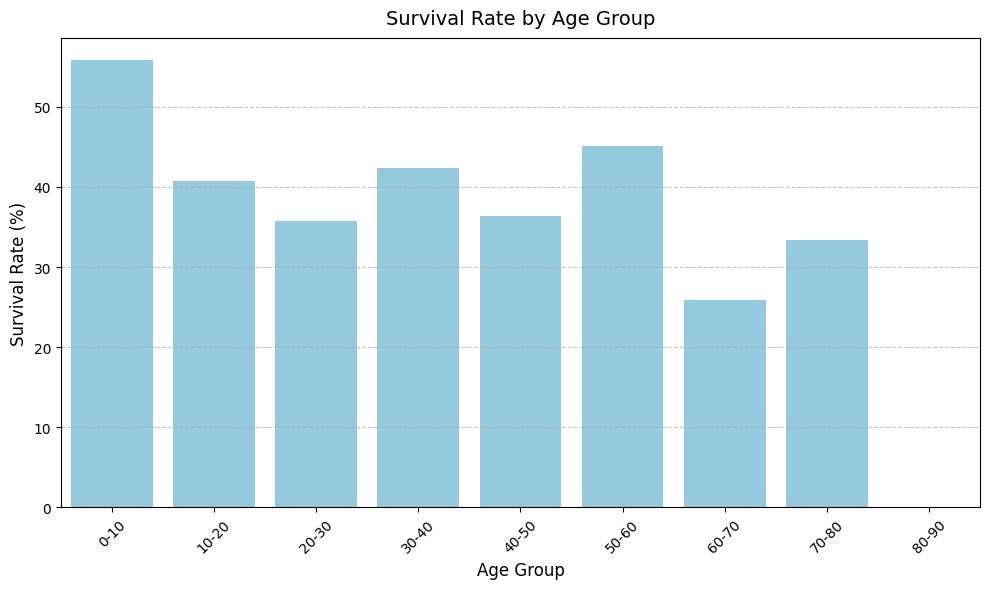

In [62]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate['Survival Rate (%)'], color='skyblue')
plt.title('Survival Rate by Age Group', fontsize=14, pad=10)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 성별별 생존율

In [63]:
# 성별별 생존율 계산
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100

# 결과 출력
print("성별별 생존율 (%):")
survival_by_sex

성별별 생존율 (%):


,Survived
Sex,
female,82.618026
male,12.930012


### 성별별 생존율 시각화

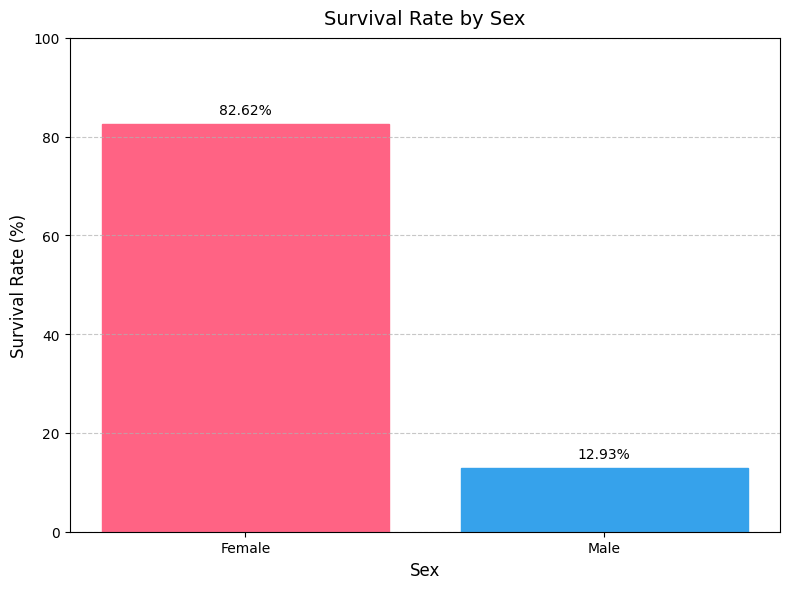

In [64]:
# 데이터 준비
labels = ['Female', 'Male']
survival_rates = [survival_by_sex['female'], survival_by_sex['male']]
colors = ['#FF6384', '#36A2EB']  # 여성: 핑크, 남성: 파랑

# 막대 차트 생성
plt.figure(figsize=(8, 6))  # 차트 크기 (너비 8인치, 높이 6인치)
plt.bar(labels, survival_rates, color=colors, edgecolor=colors, linewidth=1)

# 차트 설정
plt.title('Survival Rate by Sex', fontsize=14, pad=10)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)  # Y축 범위 0~100%
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축 그리드 추가

# 값 레이블 추가 (각 막대 위에 생존율 표시)
for i, rate in enumerate(survival_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center', fontsize=10)

# 차트 표시
plt.tight_layout()
plt.show()

# 연령대와 성별에 따른 생존율

In [65]:
# 성별 및 연령대별 생존율 계산
sex_age_survival = df.groupby(['Sex', 'AgeGroup'], observed=True)['Survived'].mean().reset_index()
sex_age_survival['Survived'] *= 100

# 열과 행 지정
pivot_table = sex_age_survival.pivot_table(index='AgeGroup', columns='Sex', values='Survived', observed=True)

# 출력
print("연령대와 성별에 따른 생존율 (%):")
pivot_table

연령대와 성별에 따른 생존율 (%):


Sex,female,male
AgeGroup,,
0-10,70.731707,42.222222
10-20,82.352941,10.638298
20-30,84.126984,9.787234
30-40,88.000000,17.037037
40-50,78.260870,13.953488
50-60,96.000000,10.810811
60-70,100.000000,4.761905
70-80,100.000000,20.000000


## 연령대와 성별에 따른 생존율 시각화

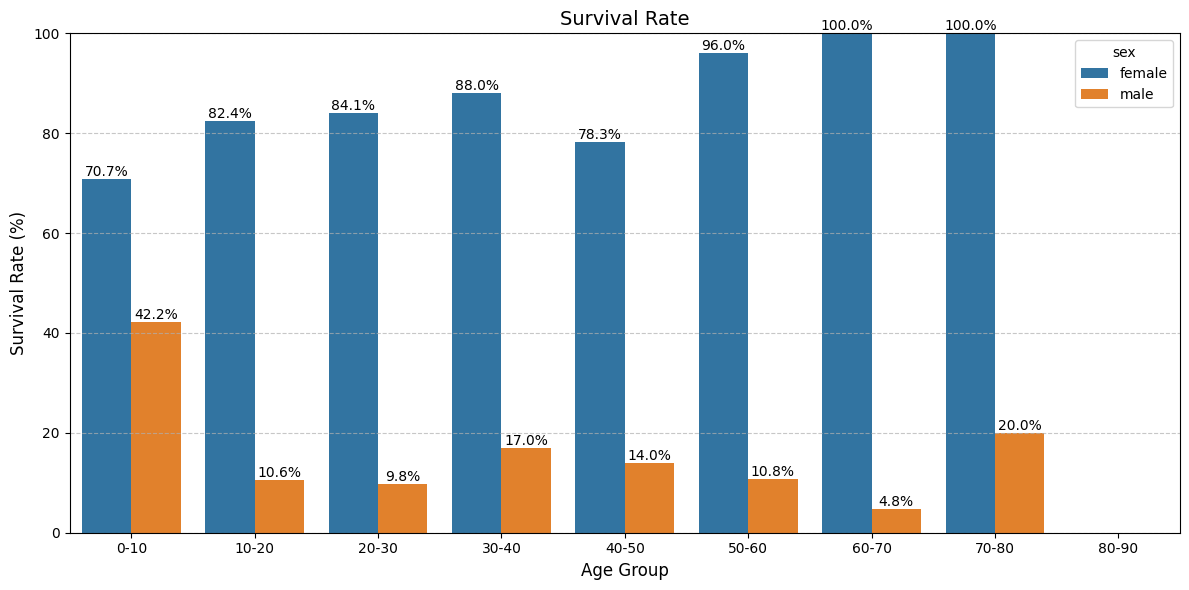

In [66]:
# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sex_age_survival, x='AgeGroup', y='Survived', hue='Sex')
plt.title('Survival Rate', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='sex', fontsize=10)
plt.tight_layout()

# 막대 그래프 위에 % 숫자 추가
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

# 탑승한 항구별 인원

In [67]:
# 항구별 인원수 데이터프레임 생성
embarked_counts_df = df["Embarked"].value_counts().reset_index()
embarked_counts_df.columns = ["항구", "탑승 인원"]

# 결과 출력
embarked_counts_df

,항구,탑승 인원
0,S,914
1,C,270
2,Q,123


## 객실 등급에 따른 생존율 시각화

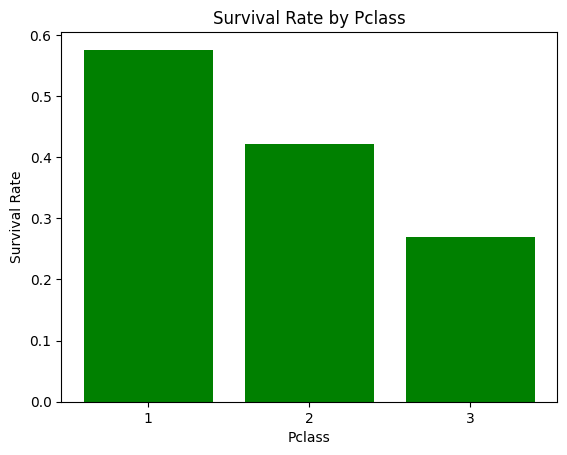

In [68]:
# 객실 등급에 따른 생존율 막대 그래프
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
plt.bar(survival_by_pclass.index, survival_by_pclass.values, color='green')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks([1, 2, 3])  # 객실 등급 눈금 설정
plt.show()

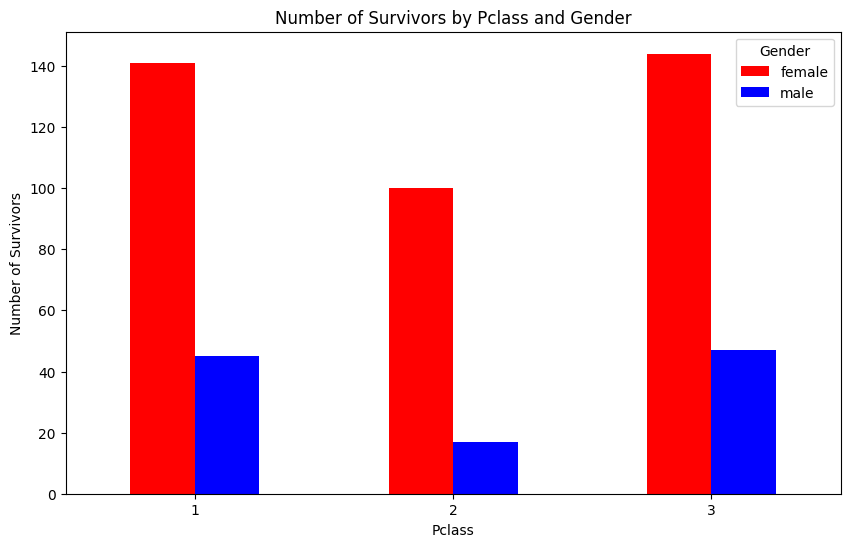

In [69]:
# 객실 등급별 남녀 생존 숫자 그룹화된 막대 그래프

# 생존자만 필터링
survived_df = df[df['Survived'] == 1]
# 객실 등급과 성별별로 생존자 수 집계
survival_by_pclass_gender = survived_df.groupby(['Pclass', 'Sex']).size().unstack()

# 그룹화된 막대 그래프 그리기
survival_by_pclass_gender.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title('Number of Survivors by Pclass and Gender')
plt.xlabel('Pclass')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)  # X축 레이블 회전 없음
plt.legend(title='Gender')
plt.show()

### 탑승한 항구별 인원 시각화

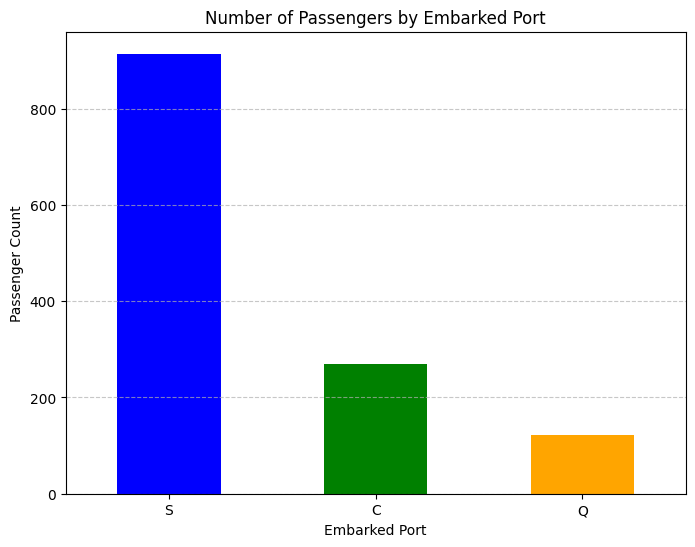

In [70]:
# 항구별 탑승 인원 계산
embarked_counts = df['Embarked'].value_counts()

# 시각화
plt.figure(figsize=(8,6))
embarked_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.xlabel("Embarked Port")
plt.ylabel("Passenger Count")
plt.title("Number of Passengers by Embarked Port")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

# 나이 vs 요금 산점도 (생존 여부로 색상 구분)

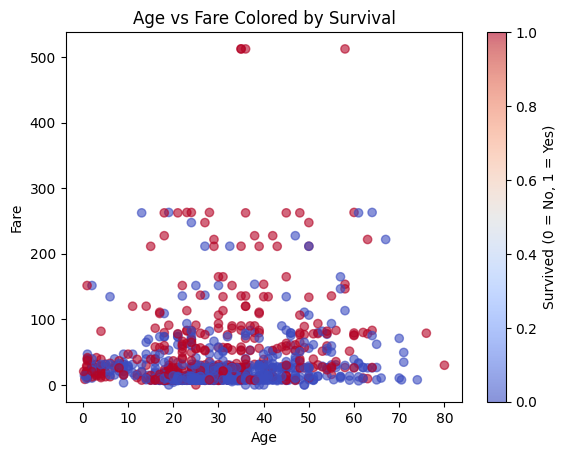

In [71]:
# 나이 vs 요금 산점도 (생존 여부로 색상 구분)
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', alpha=0.6)
plt.title('Age vs Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survived (0 = No, 1 = Yes)')
plt.show()

# 자유 데이터

In [72]:
# 1. CSV 파일 불러오기
df1 = pd.read_csv("datajo/cardata.csv")
df1.sample(3)

,월(Monthly),시도명,시군구,승용_관용,승용_자가용,승용_영업용,승용_합계,승합_관용,승합_자가용,승합_업무용,...,화물_영업용,화물_합계,특수_관용,특수_자가용,특수영업용,특수_합계,총계_관용,총계_자가용,총계_영업용,총계_합계
5582,22-Dec,경북,김천시,142,"57,209",615,"57,966",84,"2,128",257,...,"1,021","18,898",15,209,139,363,396,"77,268","2,032","79,696"
4627,22-Sep,대전,서구,270,"185,614","6,308","192,192",321,"4,573",288,...,"2,215","21,379",29,416,480,925,825,"209,562","9,291","219,678"
1508,21-Sep,충남,서산시,159,"75,382",930,"76,471",85,"2,748",508,...,"1,763","19,865",18,249,398,665,421,"96,322","3,599","100,342"


## 칼럼 확인

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13202 entries, 0 to 13201
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   월(Monthly)  13202 non-null  object
 1   시도명         13202 non-null  object
 2   시군구         13202 non-null  object
 3   승용_관용       13202 non-null  object
 4   승용_자가용      13202 non-null  object
 5   승용_영업용      13202 non-null  object
 6   승용_합계       13202 non-null  object
 7   승합_관용       13202 non-null  object
 8   승합_자가용      13202 non-null  object
 9   승합_업무용      13202 non-null  object
 10  승합_합계       13202 non-null  object
 11  화물_관용       13202 non-null  object
 12  화물_자가용      13202 non-null  object
 13  화물_영업용      13202 non-null  object
 14  화물_합계       13202 non-null  object
 15  특수_관용       13202 non-null  int64 
 16  특수_자가용      13202 non-null  object
 17  특수영업용       13202 non-null  object
 18  특수_합계       13202 non-null  object
 19  총계_관용       13202 non-null  object
 20  총계_자가용

## 관용

In [74]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_관용'] = df1['승용_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_관용'].sum(),
    '2025': df_2025.groupby('시도명')['승용_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승용_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승용_관용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,14570,16658,2088
8,서울,8908,9608,700
7,부산,3270,3844,574
12,전남,4290,4816,526
11,인천,3016,3530,514
2,경남,4904,5366,462
0,강원,3648,4104,456
13,전북,3534,3980,446
15,충남,3848,4238,390
3,경북,5150,5518,368


In [75]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_관용'] = df1['승합_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_관용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_관용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
5,대구,1770,2046,276
11,인천,2112,2366,254
0,강원,3156,3386,230
16,충북,2034,2258,224
12,전남,3166,3368,202
10,울산,894,1036,142
9,세종,366,498,132
13,전북,2638,2766,128
15,충남,2458,2586,128
7,부산,2520,2562,42


In [76]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_관용'] = df1['화물_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_관용'].sum(),
    '2025': df_2025.groupby('시도명')['화물_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_관용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
12,전남,4874,5508,634
6,대전,1274,1818,544
0,강원,4962,5450,488
13,전북,4158,4638,480
1,경기,11156,11566,410
2,경남,5190,5550,360
15,충남,4716,5000,284
4,광주,1414,1680,266
3,경북,5888,6152,264
5,대구,2704,2926,222


In [77]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_관용'] = df1['특수_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_관용'].sum(),
    '2025': df_2025.groupby('시도명')['특수_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_관용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
3,경북,500,802,302
2,경남,400,672,272
0,강원,368,574,206
1,경기,1114,1268,154
8,서울,736,862,126
12,전남,366,486,120
15,충남,544,662,118
16,충북,238,336,98
13,전북,328,420,92
5,대구,240,322,82


In [78]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_관용'] = df1['총계_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_관용'].sum(),
    '2025': df_2025.groupby('시도명')['총계_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_관용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,35262,37928,2666
12,전남,12696,14178,1482
0,강원,12134,13514,1380
13,전북,10658,11804,1146
2,경남,14294,15388,1094
15,충남,11566,12486,920
11,인천,8002,8908,906
3,경북,15080,15986,906
5,대구,6650,7514,864
8,서울,24842,25700,858


## 자가용

In [79]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_자가용'] = df1['승용_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['승용_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승용_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승용_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,9909280,11028690,1119410
11,인천,2260668,2555048,294380
2,경남,2732088,3019416,287328
15,충남,1747512,1965734,218222
7,부산,2225028,2385348,160320
12,전남,1392370,1540816,148446
16,충북,1331604,1472690,141086
3,경북,2188478,2327866,139388
8,서울,5178048,5315370,137322
0,강원,1218870,1334694,115824


In [80]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_자가용'] = df1['승합_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2021'] - agg_data['2025']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,330498,268830,61668
8,서울,170366,130902,39464
2,경남,86890,72266,14624
11,인천,72294,58062,14232
7,부산,67848,54382,13466
3,경북,81048,69714,11334
15,충남,68532,58602,9930
5,대구,50476,41946,8530
0,강원,47160,38658,8502
13,전북,53472,45106,8366


In [81]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_자가용'] = df1['화물_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['화물_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,1383308,1424264,40956
15,충남,407674,428990,21316
12,전남,447038,467966,20928
14,제주,153988,171708,17720
16,충북,285042,296248,11206
13,전북,340052,350560,10508
0,강원,297584,306572,8988
2,경남,529284,537612,8328
3,경북,586536,592104,5568
11,인천,321842,326470,4628


In [82]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_자가용'] = df1['특수_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['특수_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,21460,37752,16292
8,서울,7684,12162,4478
3,경북,6390,10514,4124
15,충남,4988,9062,4074
2,경남,6510,10574,4064
11,인천,4788,8444,3656
16,충북,3862,7202,3340
0,강원,3782,6658,2876
12,전남,5452,8298,2846
5,대구,3278,6014,2736


In [83]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_자가용'] = df1['총계_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['총계_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,11644546,12759536,1114990
11,인천,2659592,2948024,288432
2,경남,3354772,3639868,285096
15,충남,2228706,2462388,233682
12,전남,1903886,2068052,164166
16,충북,1669072,1817640,148568
3,경북,2862452,3000198,137746
7,부산,2599056,2736338,137282
0,강원,1567396,1686582,119186
13,전북,1817430,1926442,109012


## 영업용

## 합계